In [1]:
import sys
sys.path.append("../code/")

from matplotlib import pyplot as plt

In [2]:
from cv.preprocess import convert_pdf_to_jpg

pdf_path = "sample.pdf"

images = convert_pdf_to_jpg(pdf_path, 
                   output_dir=None,
                   first_page_only=False, 
                   dpi=200, n_thread=4)

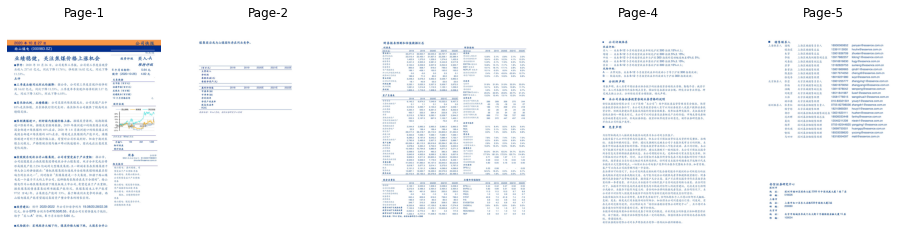

In [3]:
n = len(images)

plt.figure(figsize=(16, 4))
for i,x in enumerate(images):
    plt.subplot(1, n, (i+1))
    plt.imshow(x)
    plt.title(f"Page-{i+1}")
    plt.axis('off')

plt.show()

In [4]:
from cv.layout_parser import *

with open("../code/config.yaml") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

hlp_conf = config["LAYOUT"]["HarvardLP"]
dataset = "Prima"
modelname = hlp_conf["OpenModels"][dataset][0]
score_thresh = 0.9
parser = HarvardLayoutParser(dataset,
                             model_path=os.path.join(config["ROOT"], hlp_conf["ModelDir"], modelname + ".pth"),
                             config_path=os.path.join(config["ROOT"], hlp_conf["ModelDir"], modelname + ".yml"),
                             score_thresh=score_thresh)

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [5]:
import numpy as np
im = np.array(images[0])

text_bbxes = parser.detect(im, keep_text_only=True, dump_to_tuples=True)

print(f"Found {len(text_bbxes)} text regions.")

/Users/fan/opt/anaconda3/envs/layout/lib/python3.8/site-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370249289/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


Found 13 text regions.


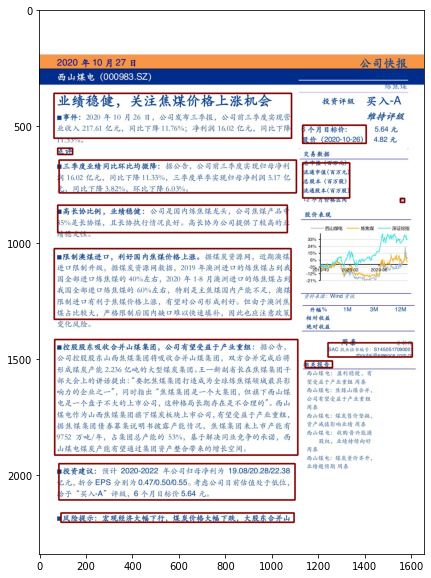

In [6]:
canvas = im.copy()
parser.show_bbxes_on(canvas, text_bbxes, show=False)

plt.figure(figsize=(10,10))
plt.imshow(canvas)
plt.show()

In [7]:
from cv.OCR import BaiduOCR

API_KEY = config["OCR"]["APIKey"]
SECRET_KEY = config["OCR"]["SecretKey"]
bocr = BaiduOCR(API_KEY, SECRET_KEY)

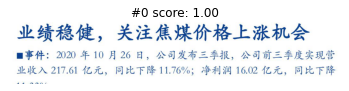

业绩稳健,关注焦煤价格上涨机会
事件:2020年10月26日,公司发布三季报,公司前三季度实现营
业收入217.61亿元,同比下降11.76;净利润16.02亿元,同比下降


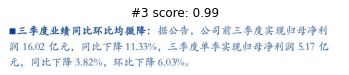

■三季度业绩同比环比均微降:据公告,公司前三季度实现归母净利
润16.02亿元,同比下降11.33%,三季度单季实现归母净利润5.17亿
元,同比下降3.82%,环比下降6.03%


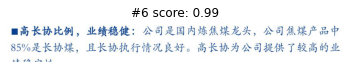

■高长协比例,业绩稳健:公司是国内炼焦煤龙头,公司焦煤产品中
85%是长协煤,且长协执行情况良好。高长协为公司提供了较高的业


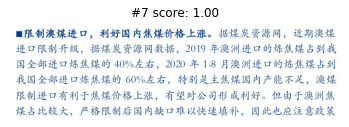

■限制澳煤进口,利好国内焦煤价格上涨据煤炭资源网,近期澳煤
进口限制升级,据煤炭资源网数据,2019年澳洲进口的炼焦煤占到我
国全部进口炼焦煤的40%左右,2020年1-8月澳洲进口的炼焦煤占到
我国全部进口炼焦煤的60%左右,特别是主焦煤国内产能不足,澳煤
限制进口有利于焦煤价格上涨,有望对公司形成利好。但由于澳洲焦
煤占比较大,严格限制后国内缺口难以快速填䃼,因此也应注意政策


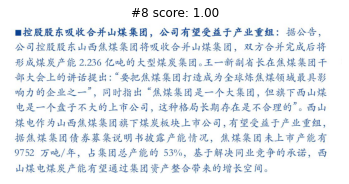

■控股股东吸收合并山煤集团,公司有望受益于产业重组:据公告,
公司控股股东山西焦煤集团将吸收合并山煤集团,双方合并完成后将
形成煤炭产能2.236亿吨的大型煤炭集团。王一新副省长在焦煤集团
部大会上的讲话提出:“要把焦煤集团打造成为全球炼焦煤领域最具影
响力的企业之一”,同时指出“焦煤集团是一个大集团,但旗下西山煤
电是一个盘子不大的上市公司,这种格局长期存在是不合理的”。西山
煤电作为山西焦煤集团旗下煤炭板块上市公司,有望受益于产业重组,
据焦煤集团债券募集说明书披露产能情况,焦煤集团未上市产能有
9752万吨/年,占集团总产能的53%,基于解决同业竞争的承诺,西
山煤电煤炭产能有望通过集团资产整合带来的增长空间。


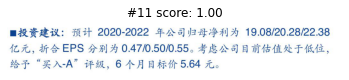

■投资建议:预计2020-2022年公司归母净利为19.08/20.28/22.38
亿元,折合EPS分别为0.4710.50/0.55考虑公司目前估值处于低位,
给予“买入-A”评级,6个月目标价5.64元。


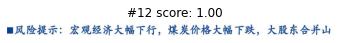

■风险提示:宏观经济大幅下行,煤炭价格大幅下跌,大股东合并山


In [8]:
n = len(text_bbxes)
text_bbxes.sort(key=lambda x: x[1])

for i,x in enumerate(text_bbxes):
    l,t,r,b,_,score = x
    
    # Filter small bbx out
    if (r - l) < 0.5:
        continue
    
    c = LayoutBaseParser.crop(im, [max(l - 0.01, 0), t, min(r + 0.01, 1), b])
    resp = bocr.query_cv2im(c)
    
    plt.title(f"#{i} score:{score: .2f}")
    plt.imshow(c)
    plt.axis('off')
    plt.show()
    
    print("\n".join(resp))